In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree 
import matplotlib.pyplot as plt
import optuna
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df=pd.read_csv(r"D:\Materials\Academic\Semester 8\AI and ML\Coding\Datasets\heart_disease_labeled_data.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,typical angina,145,233,<120,left ventricular hypertrophy,150,no,2.3,downsloping,0,fixed defect,no disease
1,67,male,asymptomatic,160,286,>120,left ventricular hypertrophy,108,yes,1.5,flat,3,normal,disease
2,67,male,asymptomatic,120,229,>120,left ventricular hypertrophy,129,yes,2.6,flat,2,reversible defect,disease
3,37,male,non-anginal pain,130,250,>120,normal,187,no,3.5,downsloping,0,normal,no disease
4,41,female,atypical angina,130,204,>120,left ventricular hypertrophy,172,no,1.4,upsloping,0,normal,no disease


In [4]:
categorical_features= ["sex", "cp", "fbs","restecg", "exang", "slope", "thal"]
df_encoded= pd.get_dummies(df,columns= categorical_features, drop_first= True)
df_encoded.head()

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_male,cp_atypical angina,cp_non-anginal pain,cp_typical angina,fbs_>120,restecg_left ventricular hypertrophy,restecg_normal,exang_yes,slope_flat,slope_upsloping,thal_normal,thal_reversible defect
0,63,145,233,150,2.3,0,no disease,True,False,False,True,False,True,False,False,False,False,False,False
1,67,160,286,108,1.5,3,disease,True,False,False,False,True,True,False,True,True,False,True,False
2,67,120,229,129,2.6,2,disease,True,False,False,False,True,True,False,True,True,False,False,True
3,37,130,250,187,3.5,0,no disease,True,False,True,False,True,False,True,False,False,False,True,False
4,41,130,204,172,1.4,0,no disease,False,True,False,False,True,True,False,False,False,True,True,False


In [5]:
label_encoder= LabelEncoder()
df_encoded["target"]= label_encoder.fit_transform(df_encoded["target"])

In [6]:
df_encoded["target"].head()

0    1
1    0
2    0
3    1
4    1
Name: target, dtype: int32

In [7]:
x=df_encoded.drop("target", axis=1)
y=df_encoded["target"]

#split the dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [8]:
model=DecisionTreeClassifier(random_state=1)
model.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [9]:
y_pred= model.predict(x_test)

In [10]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Classfication Report:\n",classification_report(y_test,y_pred))
      

Accuracy: 0.7666666666666667
Confusion Matrix:
 [[19  5]
 [ 9 27]]
Classfication Report:
               precision    recall  f1-score   support

           0       0.68      0.79      0.73        24
           1       0.84      0.75      0.79        36

    accuracy                           0.77        60
   macro avg       0.76      0.77      0.76        60
weighted avg       0.78      0.77      0.77        60



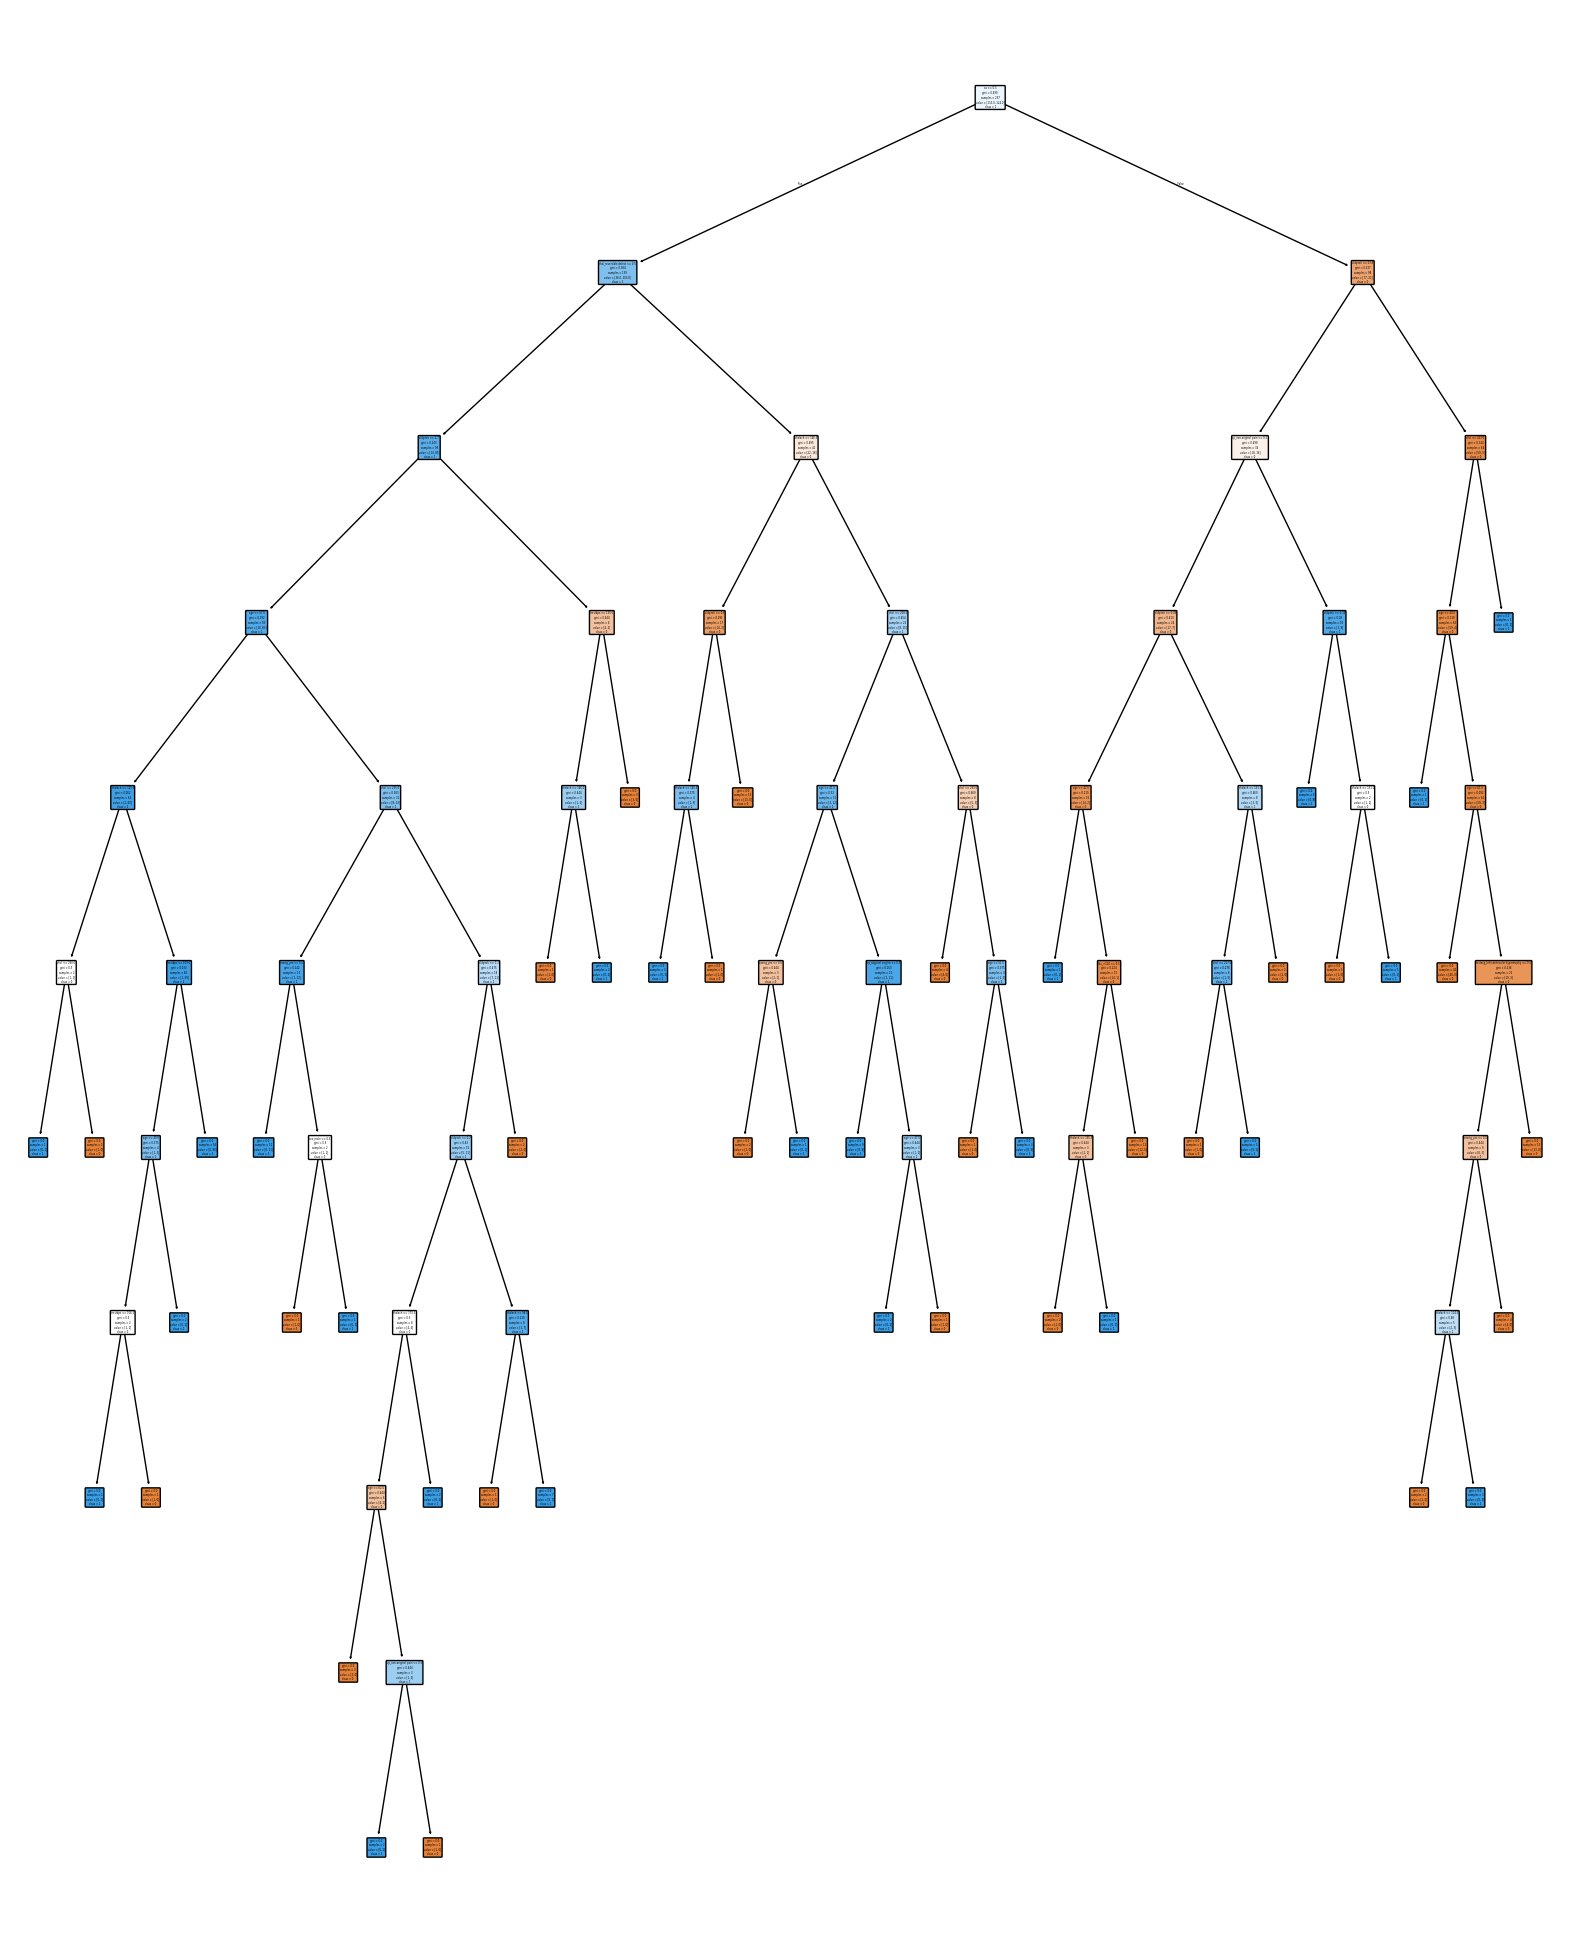

In [11]:
plt.figure(figsize=(20,25))
plot_tree(
    model,
    feature_names=x.columns,
    class_names=["0","1"],
    filled=True,
    rounded=True
)

plt.show()

In [12]:
def objective(trial):
    max_depth = trial.suggest_int("max_depth", 1, 10)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 5)

    model = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)   
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy   


In [13]:
study=optuna.create_study(direction="maximize")
study.optimize(objective,n_trials=20)

print("Best Hyperparameters:",study.best_params)

model=DecisionTreeClassifier(**study.best_params,random_state=42)
model.fit(x_train,y_train)
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)
print("Train Accuracy:",accuracy_score(y_train,y_train_pred))
print("Test Accuracy:",accuracy_score(y_test,y_test_pred))

[I 2025-09-15 08:26:44,823] A new study created in memory with name: no-name-af5b10b1-b82d-44f3-8618-12031cae5de8
[I 2025-09-15 08:26:44,845] Trial 0 finished with value: 0.8 and parameters: {'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.8.
[I 2025-09-15 08:26:44,855] Trial 1 finished with value: 0.7666666666666667 and parameters: {'max_depth': 2, 'min_samples_split': 3, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.8.
[I 2025-09-15 08:26:44,865] Trial 2 finished with value: 0.7666666666666667 and parameters: {'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.8.
[I 2025-09-15 08:26:44,876] Trial 3 finished with value: 0.7666666666666667 and parameters: {'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.8.
[I 2025-09-15 08:26:44,883] Trial 4 finished with value: 0.7833333333333333 and parameters: {'max_depth': 9, 'min_samples_split': 7, 'min_sam

Best Hyperparameters: {'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 3}
Train Accuracy: 0.9156118143459916
Test Accuracy: 0.8
